IndexError: index 5 is out of bounds for axis 0 with size 5

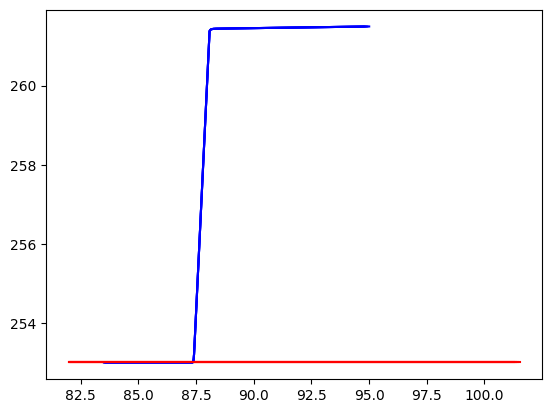

In [5]:
import numpy as np
import torch
from matplotlib import pyplot as plt

# from CI3PP.model import CI3PP
from P3VI.utils import load_data
# from CI3PP.train_60_80 import CI3PPWrapper as CI3PPWrapper_60_80
# from ped_path_predictor.m2p3_60_80 import PathPredictor
from ped_path_predictor.model import M2P3

data_p1 = "./P3VI/data/01_multi_p1.npy"
data_p2 = "./P3VI/data/01_multi_p2.npy"
data_car = './P3VI/data/01_multi_car.npy'


n_obs = 60
n_pred = 80
sample_pos = 1920 * 74
stepsize = 1920
sample_range = 10

def plot_path(data, pred=None, actual=None):
    data = data.cpu().detach().numpy()

    plt.plot(data[:, 0], data[:, 1], 'r')

    if pred is not None:
        pred = pred.squeeze()
        pred = pred.cpu().detach().numpy()


        absolute = np.array([data[-1] + pred[0]])
        for i in range(1, pred.shape[0]):
            absolute = np.vstack((absolute, [pred[i] + absolute[i - 1]]))

        plt.plot(absolute[:, 0], absolute[:, 1], 'b', linestyle='dashed')
    #
    if actual is not None:
        actual = actual.cpu().detach().numpy()
        absolute_actual = np.array([data[-1] + actual[0]])
        for i in range(1, pred.shape[0]):
            absolute_actual = np.vstack((absolute_actual, [actual[i] + absolute_actual[i - 1]]))

        plt.plot(absolute_actual[:, 0], absolute_actual[:, 1], 'g', linestyle='dotted')


    plt.show()
    # for i in range(0, 10):
    #     plt.plot(data[i, :, 0], data[i, :, 1], 'r')
    #     # plt.plot(pred[i, :, 0], pred[i, :, 1], 'b')
    #     plt.show()

def plot_all(data):
    data = data.cpu().detach().numpy()
    for x in range(sample_range):
        plt.plot(data[:, sample_pos+x*stepsize, 0], data[:, sample_pos+x*stepsize, 1], 'r')
        print(data[:, sample_pos+x*stepsize, 2:])
    plt.show()

    # plt.plot(data[:, 255, 0], data[:, 255, 1])
    # plt.show()
    # for i in range(0, 10):
    #     plt.plot(data[i, :, 0], data[i, :, 1], 'r')
    #     plt.show()


def plot_rel(actual, pred):
    actual = actual.cpu().detach().numpy()
    pred = pred.squeeze()
    pred = pred.cpu().detach().numpy()
    plt.plot(actual[:, 0], actual[:, 1], 'r')
    plt.plot(pred[:, 0], pred[:, 1], 'b')
    plt.show()




if __name__ == '__main__':
    # obs_train, pred_train = load_data(data, 500, 0)

    # convert to np array and float32
    # input_train = np.array(obs_train[:, :, :], dtype=np.float32)
    # output_train = np.array(pred_train[:, :, :], dtype=np.float32)

    def load_full(data, n_observed_frames, n_predict_frames):
        with open(data,'rb') as f:
            raw = np.load(f, allow_pickle=True)


        enum_conv = lambda t: t.value
        vfunc = np.vectorize(enum_conv)
        raw[:,:,2] = vfunc(raw[:,:,2])
        raw[:,:,3] = vfunc(raw[:,:,3])
        raw = raw.astype(np.float32)
        window = raw.shape[1] - n_observed_frames - n_predict_frames

        observed_data, predict_data = [], []
        for k in range(0, window, 2):
            observed = raw[:, k:n_observed_frames + k, :]
            pred = raw[:, k + n_observed_frames:n_predict_frames + n_observed_frames + k, 0:2]

            observed_data.append(observed)
            predict_data.append(pred)

        observed_data = np.concatenate(observed_data, axis=0)
        predict_data = np.concatenate(predict_data, axis=0)

        return observed_data, predict_data


    obs_1, pred_1 = load_full(data_p1, 488, 2)
    obs_2, pred_2 = load_full(data_p2, 488, 2)

    for i in range(1, 10):
        to_plot = obs_1[i]
        # to_plot2 = obs_2[i]
        plt.plot(to_plot[:, 0], to_plot[:, 1], "b")
        to_plot = obs_2[i]
        # to_plot2 = obs_2[i]
        plt.plot(to_plot[:, 0], to_plot[:, 1], "r")
        # plt.plot(to_plot2[:, 0], to_plot2[:, 1])
    plt.show()


    print("S")

